In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random;
import tqdm;

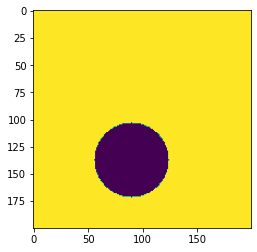

In [5]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(blank_image);

In [6]:
def create_training_Data():
  l = 10000;
  X_train = np.zeros(shape=[l,IMAGE_SIZE, IMAGE_SIZE,1]);
  Y_train = np.zeros(shape = [l,3]);
  for i in range(l):
    rad = random.randint(5,50);
    c_x = random.randint(rad,IMAGE_SIZE-rad);
    c_y = random.randint(rad,IMAGE_SIZE-rad);
    Y_train[i,0]= c_x/IMAGE_SIZE;
    Y_train[i,1] = c_y/IMAGE_SIZE;
    Y_train[i,2] = rad/IMAGE_SIZE;
    blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8);
    X_train[i,:,:,0] = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
  return {'X_Train' : X_train, 'Y_Train': Y_train};
  

In [7]:
training_Data = create_training_Data();

array([ 93., 137.,  39.])

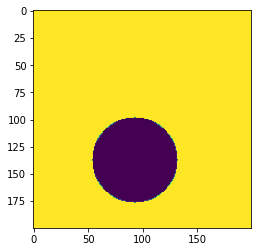

In [8]:
plt.imshow(training_Data['X_Train'][1999].reshape(200,200))
IMAGE_SIZE*training_Data['Y_Train'][1999]

In [9]:
import tensorflow as tf
from tensorflow.keras import layers;
from tensorflow.keras import Model;

In [18]:
img_input = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = layers.Conv2D(5, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(20, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(3, 5, activation='relu', strides = 1)(x)

# TODO
x = tf.keras.layers.Flatten()(x)
output = tf.keras.layers.Dense(units=3, activation="relu")(x)

model = Model(img_input, output)

model.summary()

model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

model.fit(training_Data["X_Train"],training_Data["Y_Train"], epochs = 10,verbose=1)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 200, 200, 5)       50        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 5)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 10)        460       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 47, 47, 20)        1820      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 20)        0   

In [19]:
IMAGE_SIZE*model.predict(training_Data['X_Train'][3].reshape(1,IMAGE_SIZE, IMAGE_SIZE,1))

array([[96.333595, 77.19146 , 27.715345]], dtype=float32)

In [20]:
IMAGE_SIZE*training_Data['Y_Train'][3]

array([96., 77., 32.])

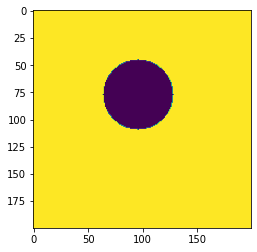

In [16]:
plt.imshow(training_Data['X_Train'][3].reshape(200,200))

[19, 44, 19]
[[35.4069   46.666992  9.254682]]


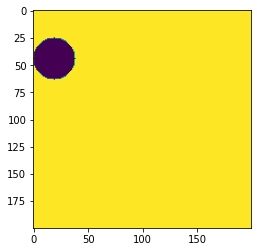

In [17]:
IMAGE_SIZE = 200;
rad = random.randint(5,50);
c_x = random.randint(rad,IMAGE_SIZE-rad);
c_y = random.randint(rad,IMAGE_SIZE-rad);
print([c_x, c_y, rad])
blank_image = np.ones(shape=[IMAGE_SIZE, IMAGE_SIZE], dtype=np.uint8)
new_Image = cv2.circle(blank_image, (c_x,c_y), rad, 0, -1);
plt.imshow(new_Image);
print(IMAGE_SIZE*model.predict(new_Image.reshape(1,IMAGE_SIZE, IMAGE_SIZE,1)))